## Metrics To Evaluate Machine Learning Algorithms

The metrics that you choose to evaluate your machine learning algorithms with are very important. Choice of metrics influences how the performance of machine learning algorithms is measured and compared. They influence how you weight the importance of different characteristics in the results and ultimately the algorithm to choose.

For classification metrics, we use the Pima Indians diabetes dataset.



### Classification Metrics

**Classification accuracy** is the number of correct predictions made as a ratio of all predictions made. Below is an example of calculating classification accuracy.

In [12]:
# Cross Validation Classification Accuracy
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

url = "pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

# Charger les données depuis le fichier CSV, le nom des colonnes sont définis dans la variable "names" 
dataframe = pandas.read_csv(url, names=names)
# Stocker les valeurs de toutes les cellules du dataframe.
array = dataframe.values

# X est un tableau qui contient toutes les valeurs des huit variables explicatives des données
X = array[:,0:8]

# Y est un tableau qui contient les valeurs des étiquettes de classe des données.
Y = array[:,8]

seed = 7
# On construit l'objet Kfold pour effectuer la cv (dans ce cas c'est un cv statifiée = répartition proportionnelle)
# Le nombre de plis utilisé = 10
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)

# On construit l'objet LogisticRegression pour entraîner notre modèle en utilisant l'algorithme "liblinear" 
#Ce modèle est utilisé pour effectuer la classification binaire des patients en présence ou non de diabète.
model = LogisticRegression(solver='liblinear')

# Ce param "scoring" est défini sur "accuracy" pour calculer l'exactitude de la classification pour chaque pli de cv.
scoring = 'accuracy'

# Comme pour le lab2, la fonction cross_val_score retourne un tableau contenant les scores d'exactitude de classification 
# pour chaque fold de cv
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

# Afficher la moyenne et l'écart-type des scores 
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.771 (0.051)


**Logistic loss (or log loss)** is a performance metric for evaluating the predictions of probabilities of membership to a given class. Below is an example of calculating log loss for Logistic regression predictions on the Pima Indians onset of diabetes dataset. The scalar probability between 0 and 1 can be seen as a measure of confidence for a prediction by an algorithm. (Smaller log loss is better with 0 representing a perfect log loss.)


In [13]:
# Cross Validation Classification LogLoss
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

url = "pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
model = LogisticRegression(solver='liblinear')

# Cette fois-ci, au lieu d'utiliser scoring = 'accuracy', on calcul le logloss 
# Logloss = Erreur logistique
scoring = 'neg_log_loss'

results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Logloss: %.3f (%.3f)" % (results.mean(), results.std()))

# La valeur de logloss = -0.494 est proche de zéro ce qui indique que le modèle est trés précis dans ses prédictions 
# Pour l'écart-type = 0.042, c'est un faible valeur signifie que les scores sont cohérents sur les différents fold 
# On peut conclure que le modèle est {fiable + stable} 

Logloss: -0.494 (0.042)


Area Under **ROC Curve** (or ROC AUC for short) is a performance metric for binary classification problems.The example below provides a demonstration of calculating AUC. The AUC represents a model’s ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random.



AUC: 0.829  (0.047) 


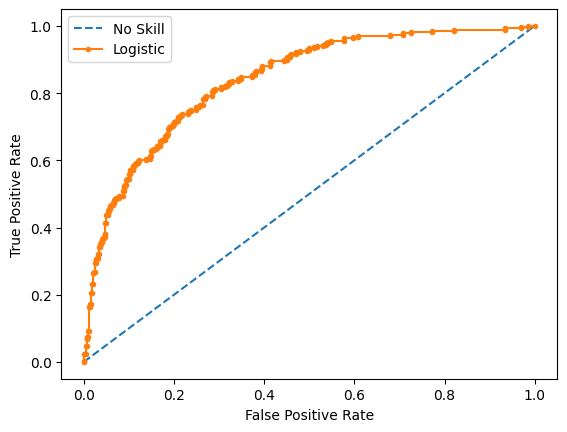

In [14]:
# Cross Validation Classification ROC AUC
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import roc_curve

url = "pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
seed = 7

kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
# J'ai ajouté le param max_iter=1000 pour ne pas avoir le warning 
model = LogisticRegression(max_iter=1000)

# Cette fois-ci, au lieu d'utiliser scoring = 'neg_log_loss', on calcul le roc_auc 
# roc_auc = Area Under the Receiver Operating Characteristic Curve
scoring = 'roc_auc'
results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("AUC: %.3f " % results.mean(), "(%.3f) " % results.std())

# La valeur de roc_auc = 0.829 signifie qu'on a une précision de 82.9% en moyenne pour la capacité de distinguer les 
# résultats positifs des résultats négatifs. L'écart-type de 0.047 indique que la précision du modèle peut varier
# de +/- 4.7% en moyenne d'un fold à l'autre.

# Entrainer le modèle 
model.fit(X, Y)

# Prédire les probabilités de classe 
yhat = model.predict_proba(X)

# Récupérer uniquement les probabilités pour la classe positive
pos_probs = yhat[:, 1]

# plot no skill roc curve
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')

# Calculer fpr et tpr
# fpr = false positive rate
# tpr = true positive rate
# Ces valeurs sont nécessaires pour tracer la courbe ROC
fpr, tpr, _ = roc_curve(Y, pos_probs)

# plot model roc curve
pyplot.plot(fpr, tpr, marker='.', label='Logistic')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

# On remarque d'après la figure que AUC est proche de 1 => bonne modèle

You can see the the AUC is relatively close to 1 and greater than 0.5.

**The confusion matrix** is a handy presentation of the accuracy of a model with two or more classes. Below is an example of calculating a confusion matrix for a set of prediction by a model on a test set.

In [15]:
# Cross Validation Classification Confusion Matrix
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

url = "pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

dataframe = pandas.read_csv(url, names=names)

array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

#Proportion de 33% pour le test_data
test_size = 0.33

seed = 7

# Séparer les données d'entrainement et les données de test
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)

# On effectue des prédictions sur l'ensemble de données de test à l'aide de la fonction predict
predicted = model.predict(X_test)

# On crée la matrice de confusion en comparant les prédictions effectuées avec les vraies étiquettes de classe 
# de l'ensemble de test
matrix = confusion_matrix(Y_test, predicted)
print(matrix)

#On a obtenu :
# VN = 141 => le modèle a correctement prédit que 141 échantillons n'appartenaient pas à la classe + (absence de diabète).
# FN = 41 => le modèle a incorrectement prédit que 41 échantillons n'appartenaient pas à la classe + alors qu'en réalité 
#            ils y appartenaient (ce sont des cas de diabète non détectés).
# VP = 51 => le modèle a correctement prédit que 51 échantillons appartenaient à la classe + (présence de diabète).
# FP = 21 => le modèle a incorrectement prédit que 21 échantillons appartenaient à la classe + alors qu'en réalité 
#            ils n'y appartenaient pas (ce sont des cas non diabétiques prédits comme étant positifs).

[[141  21]
 [ 41  51]]


Scikit-learn does provide a convenience report when working on classification problems to give you a quick idea of the accuracy of a model using a number of measures.

The *classification_report()* function displays the **precision**, **recall**, **f1-score** and **support** for each class. The example below demonstrates the report on the binary classification problem.

In [9]:
# Cross Validation Classification Report
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

url = "pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
test_size = 0.33
seed = 7

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

predicted = model.predict(X_test)

# La fonction classification_report fournit les mesures de précision, rappel, f1-score et de support pour chaque classe
report = classification_report(Y_test, predicted)

print(report)

# Précision = la proportion des résultats positifs prédits correctement parmi tous les résultats positifs prédits
# Précision pour la classe 0 = 81%, pour la classe 1 = 74%

# Recall = la proportion de résultats positifs prédits correctement parmi tous les résultats positifs réels
# Recall pour la classe 0 = 88%, pour la classe 1 = 63%

# F1-score = une mesure de la précision et du rappel qui combine les deux en une seule mesure
# F1-score pour la classe 0 = 84%, pour la classe 1 = 68%

# Support =  le nombre d'observations de chaque classe dans le jeu de données de test

# Accuracy = la proportion de prédictions correctes parmi toutes les prédictions
# Accuracy = 79%

# Macro avg = la moyenne pondérée des scores pour chaque classe
# Dans ce cas, la macro moyenne pour la précision, le recall et le F1-score est de 0,78, 0,75 et 0,76, respectivement.

# Weighted avg = la moyenne pondérée des scores pour chaque classe, pondérée par le nombre d'observations de chaque classe. 
# Dans ce cas, la moyenne pondérée pour la précision, le rappel et le score F1 est de 0,78, 0,79 et 0,78, respectivement.

              precision    recall  f1-score   support

         0.0       0.77      0.86      0.81       161
         1.0       0.69      0.56      0.62        93

    accuracy                           0.75       254
   macro avg       0.73      0.71      0.72       254
weighted avg       0.74      0.75      0.74       254



/home/itsmeayoub/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Regression Metrics

For regression metrics, we use the Boston House Price dataset

**The Mean Absolute Error** (or MAE) is the average of the absolute differences between predictions and actual values. It gives an idea of how wrong the predictions were. The example below demonstrates calculating mean absolute error on the Boston house price dataset.

In [16]:
# Cross Validation Regression MAE
import pandas
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

url = "housing.data"
# Ces variables représentent des caractéristiques des maisons et des quartiers de Boston.
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

dataframe = pandas.read_csv(url, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
seed = 7

kfold = model_selection.KFold(n_splits=10)
model = LinearRegression()

# Cette fois-ci, au lieu d'utiliser scoring = 'roc_auc', on calcul le neg_mean_absolute_error 
# neg_mean_absolute_error = Erreur absolue moyenne négative 
scoring = 'neg_mean_absolute_error'

results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("MAE: %.3f (%.3f)" % (results.mean(), results.std()))

# On a obtenu MAE = -4.005 (c'est un valeur négative) =>  signifie que le modèle prédit les valeurs de prix 
#                                                         légèrement en dessous de la valeur réelle en moyenne.

# Pour l'écart-type, il indique la variabilité des résultats de la MAE pour chaque fold de la cv. 

MAE: -4.005 (2.084)


/tmp/ipykernel_10041/1040796656.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pandas.read_csv(url, delim_whitespace=True, names=names)


A value of 0 indicates no error or perfect predictions.

**The Mean Squared Error** (or MSE) is much like the mean absolute error in that it provides a gross idea of the magnitude of error. The example below provides a demonstration of calculating mean squared error.

In [17]:
# Cross Validation Regression MSE
import pandas
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

url = "housing.data"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

dataframe = pandas.read_csv(url, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
seed = 7

kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
model = LinearRegression()

# Cette fois-ci, au lieu d'utiliser scoring = 'neg_mean_absolute_error', on calcul le neg_mean_squared_error 
# neg_mean_squared_error = Erreur quadratique moyenne
scoring = 'neg_mean_squared_error'

results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("MSE: %.3f (%.3f)" % (results.mean(), results.std()))

# On obtient MSE = -23.747
# MSE est une mesure de l'erreur au carré, une valeur < 0 indique que le modèle fonctionne mieux que la prédiction
# qui consiste à prédire la moyenne de la variable cible

# L'écart-type de 11.143 indique que la variance des scores de MSE pour les 10 fold est assez importante
# Ce qui peut indiquer une instabilité du modèle sur les données

MSE: -23.747 (11.143)


/tmp/ipykernel_10041/2030784789.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pandas.read_csv(url, delim_whitespace=True, names=names)


 Remember to take the absolute value before taking the square root to calculate the RMSE. Calculate it.
 
**The R^2 (or R Squared)** metric provides an indication of the goodness of fit of a set of predictions to the actual values. In statistical literature, this measure is called the coefficient of determination. The example below provides a demonstration of calculating the mean R^2 for a set of predictions.

In [18]:
# Cross Validation Regression R^2
import pandas
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

url = "housing.data"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

dataframe = pandas.read_csv(url, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
seed = 7

kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
model = LinearRegression()

# Cette fois-ci, au lieu d'utiliser scoring = 'neg_mean_squared_error', on calcul le r2 
# r2 = R-squared
scoring = 'r2'

results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("R^2: %.3f (%.3f)" % (results.mean(), results.std()))

# On obtient de r^2 = 0.718 qui est élévée ce qui indique que le modèle est capable de bien prédire les valeurs cibles 
# L'écart-type de 0,099 suggère que les résultats de la validation croisée ne varient pas beaucoup d'un folde à l'autre,
# ce qui indique que le modèle est stable et ne souffre pas de sur-ajustement.

R^2: 0.718 (0.099)


/tmp/ipykernel_10041/1236995521.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pandas.read_csv(url, delim_whitespace=True, names=names)


## Activity

Import the Iris Dataset and classify the data using logistic regression and SVC variants then report the results obtained using the different metrics. What algorithm gave the best results?

Import the dataset auto_imports and perform a regression, report the results...